In [35]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction import stop_words

from nltk.tokenize import sent_tokenize, word_tokenize

import os, sys
from glob import glob
import numpy as np
import gc 

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

In [27]:
def preprocess(raw_text):
    # tokenize
    tokens = word_tokenize(raw_text)    

    # drop to lowercase
    tokens = [word.lower() for word in tokens]
        
    # *step two* (default): remove non-alpha characters,
    # punctuation, and as many other "noise" elements as
    # possible. If dealing with a single character word,    
    # drop non-alphabetical characters. This will remove 
    # most punctuation but preserve many words containing
    # marks such as the '-' in 'self-emancipated'

    tmp_text=list()

    for word in tokens:
        if len(word) == 1:
            if word.isalpha == True:
                tmp_text.append(word)
        else:
             tmp_text.append(word)           
    tokens = tmp_text

    # now remove leading and trailing quotation marks,      
    # hyphens and  dashes
    tmp_text=list()
    drop_list = ['“','"','”','-','—']
    for i, word in enumerate(tokens):
        if word[0] in drop_list:
            word = word[1:]
        if word[-1:] in drop_list:
            word = word[:-1]
        
        word = word.replace("gyftis", "gifts")
        word = word.replace("gether", "gather")
        word = word.replace("spirituall", "spiritual")
        word = word.replace("feythfull", "faith")
        word = word.replace("wytnes", "witness")
        word = word.replace("almes", "alms")
        word = word.replace("desyre", "desire")
        word = word.replace("selfe", "self")
        word = word.replace("saffely", "safely")
        word = word.replace("realme", "realm")
        word = word.replace("acte", "act")
        word = word.replace("fourme", "form")
        word = word.replace("subiectes", "subjects")
        word = word.replace("theyr", "their")
        word = word.replace("kynde", "kind")
        word = word.replace("kynge", "king")
        word = word.replace("kyndes", "kinds")
        word = word.replace("vpon", "unto")
        word = word.replace("purueyours", "purveyors")
        word = word.replace("highnes", "highness")
        word = word.replace("euery", "every")
        word = word.replace("quene", "queen")
        word = word.replace("quenes", "queens")
        word = word.replace("whiche", "which")
        word = word.replace("bloude", "blood")
        word = word.replace("soueraine", "sovereign")
        
        if word.isdigit():
            word = ""
        
        # catch any zero-length words remaining
        if len(word) > 0:
            tmp_text.append(word)
        
    return(tmp_text)

In [39]:
import gzip

ccp_models = dict()

input_texts = ["../texts/henry/henry.tar.gz",
              "../texts/edward/edward.tar.gz",
              "../texts/mary/mary.tar.gz",
              "../texts/elizabeth/elizabeth.tar.gz",
              "../texts/james/james.tar.gz",
              "../texts/charles/charles.tar.gz"]

# setup vectorizer and process text

for fp in input_texts:
    
    model_name = os.path.basename(fp).split(".")[0]
    print("starting: {0}".format(model_name))

    print("loading gzipped texts...")
    raw_text = gzip.open(fp,'rt').read()
    
    print("preprocessing...")
    tokens = preprocess(raw_text)

    # simulate documents
    print("segmenting...")
    collection = list()
    segment_length = int(len(tokens)/1000)
    
    for j in range(1000):
        segment = tokens[segment_length*j:segment_length*(j+1)]
        collection.append(' '.join(segment))
        
    # free up memory
    del raw_text
    gc.collect()
    
    vec = CountVectorizer(input='content',
                      min_df=2,
                      stop_words = [",","the","and","of","or","to","in","shall","be","that","any","by",".",
              "such","as","this","for","same","all","said","other","'s",";",
              "her","is","every","[","]","they","within", "our", "not", "so",
              "made", "no", "then", ":", "do", "from", "if", "it", "which", "at", "with",
             "thereof","upon", "a", "because", "used", "some", "but", "aforesaid", "also",
             ")","(", "what", "&", "may", "are", "their", "them", "sayde", "suche", "shalbe", "anye", "sayd",
             "thesaid", "/", "...", "/", "either"],
                      lowercase=True)

    # train model (LDA)
    counts = vec.fit_transform(collection)
    dc, vc = counts.shape
    print("read {0} documents with {1} vocabulary".format(dc,vc))
    
    # Build the LDA Model
    # n_components = number of topics to extract (if topics are too similar, extract more)
 
    ccp_model = LatentDirichletAllocation(n_components=2,
                                            max_iter=5,
                                            learning_method='batch',
                                            random_state=1)
    ccp_models[model_name] = [ccp_model, counts, vec, collection]    

starting: henry
loading gzipped texts...
preprocessing...
segmenting...
read 1000 documents with 1713 vocabulary
starting: edward
loading gzipped texts...
preprocessing...
segmenting...
read 1000 documents with 6313 vocabulary
starting: mary
loading gzipped texts...
preprocessing...
segmenting...
read 1000 documents with 442 vocabulary
starting: elizabeth
loading gzipped texts...
preprocessing...
segmenting...
read 1000 documents with 5771 vocabulary
starting: james
loading gzipped texts...
preprocessing...
segmenting...
read 1000 documents with 9247 vocabulary
starting: charles
loading gzipped texts...
preprocessing...
segmenting...
read 1000 documents with 1509 vocabulary


henry:

Topic #0:
he his king my have was you on should has him had these things book henry thomist us against when scripture will one let who words your would luther does defender most how god christ lies argument man were more than here we now great can himself says world time papacy church therefore me after its sacraments first grace very whole water out where own concerning set truth into being an see good there like royal over england place come believe lord matter saint mass ye those part once think sacred up worthy reader thomas write am why foolish unto 

Topic #1:
have he faith me will men who god christ has we can say nothing thomist church bread only even my there king one make therefore sacrament work right words was been word thing body must nor does should were against him these mass now scripture man henry since good an more lord use authority his paul than alone us when on scriptures articles prove let into here own those see could concerning how sacrifice saying way p

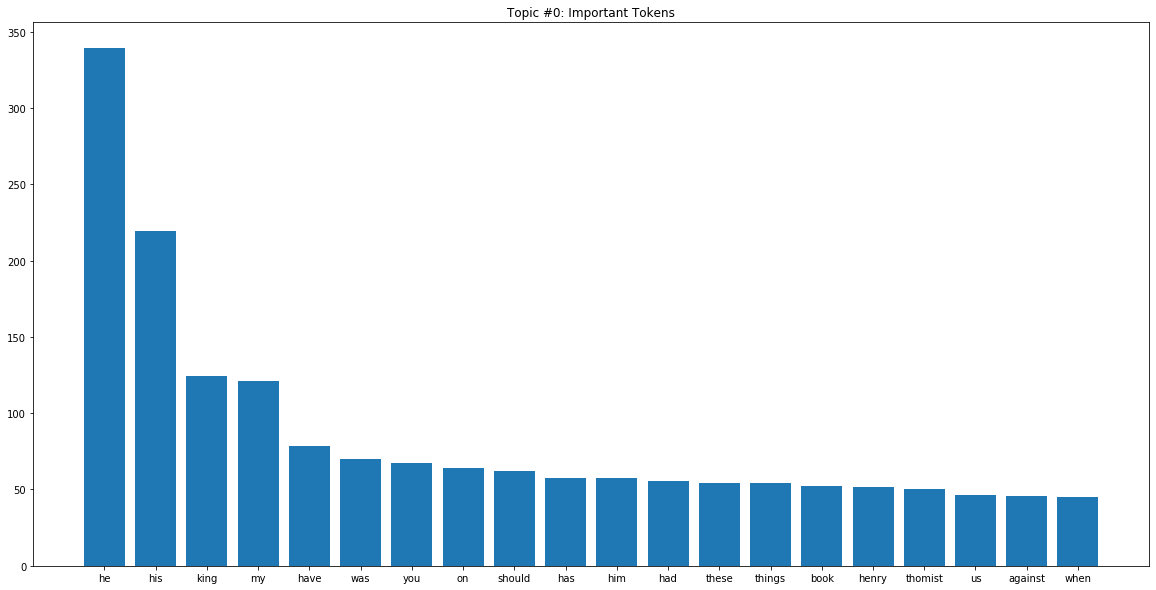

edward:

Topic #0:
ther master was ys day armes men my after lord cam blake grett ij london on unto iiij gownes ser he wher sant iij bered have clarkes dosen dyd dener mony mare standard goodly chyrche had blank mornars women skochyons whyt grace mad armur hangyd odur whent gold sword his there syngyng haroldes here god gret garter pryche viij quen pore kyng we good resident xx cott alle westmynster red man you thay your syd evere yerle ye one rod vj were hym althermen xij baner furst harold lade nodur june velvett borne bowt bare cottes sam corse plase sermon 

Topic #1:
was day lord he his master on sir ther london my after ij had grett john iiij bered dyd armes funeral thomas sam see ys sant st unto dosen quen men ibid one diary ser vj man blank wyche died ms were lady wher mony torchys grace pryche august edward she william iij who king xij marche vol resident an buried dener skochyons july queen have lade september henry duke son knyght there been mare kyng towre cam masse branchy

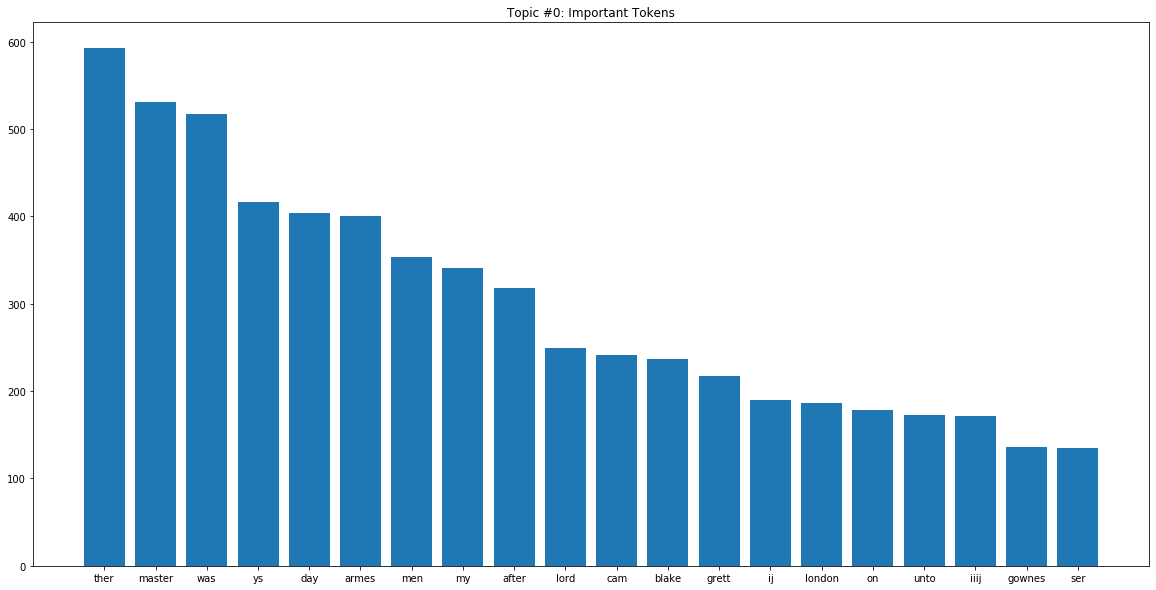

mary:

Topic #0:
god 000000 persons subjects kind person one after highness king take most lambes queens deputies wethers lawes beues we have 00catherineparnell ustar staff tyme salte enactd his true should lord well calues fishe ought muche day prouided jackman further religion swyne deputie hyghnes year estatutes counties contayned before aucthoritie act queen time late maiesties yf therefore al were dominions being punishment session constable obedient moste kyng forth out schoolmasters past cowlyn first diuerse countie 000024 named seuerall heretofore set done wherof only make moost vndertakers calfes men toward feast spiritual hym man where therein forfeyture soeuer persones acts daye sort 

Topic #1:
good commission realm commissions unto haue chease butter there grayne kinds vnto purveyors bakon gese capons 000644 txt vs he great my aforesayde connies hennes everye pigges ye people an taken graunted parliament grace come queen 000765 both without hath you john subjects 000024 au

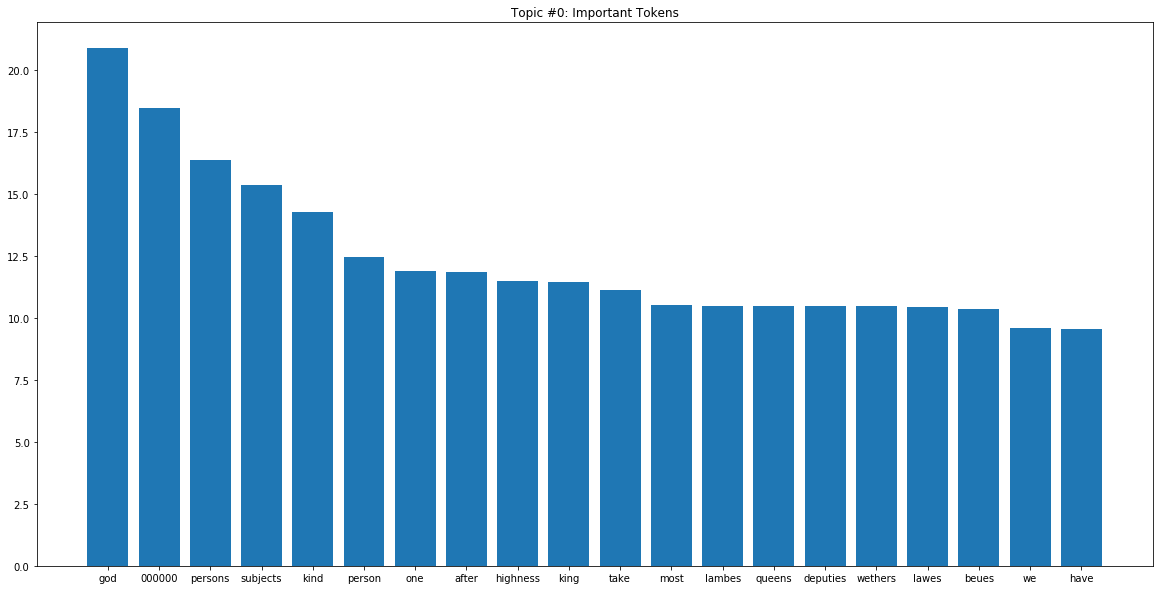

elizabeth:

Topic #0:
we god have he his us thy christ unto men was these holy him church were lorde hath thou one man yet there my lord say when father who will people good ye you me had did should into only most nor faith things let many more without own how can jesus ever life out saith amen against now thee doth come before up an make name himself might world shal than been after your rome very being time minister al truth fathers gospel great therefore mercy those grace whom true neither would cause ought through even called see away 

Topic #1:
kl lesson id prayer after first john prid day acts kal person second days act one unto idus april common easter luke his evening kings realm added time saint sunday hath before authority eccles appointed book psalms offence reg enactd next lessons mary majesty cor term persons sol notes deut thirty queen gen there highnesss kalend your service form shal moring nonas where etc trinity england he convicted isaiah exod matt march twenty parli

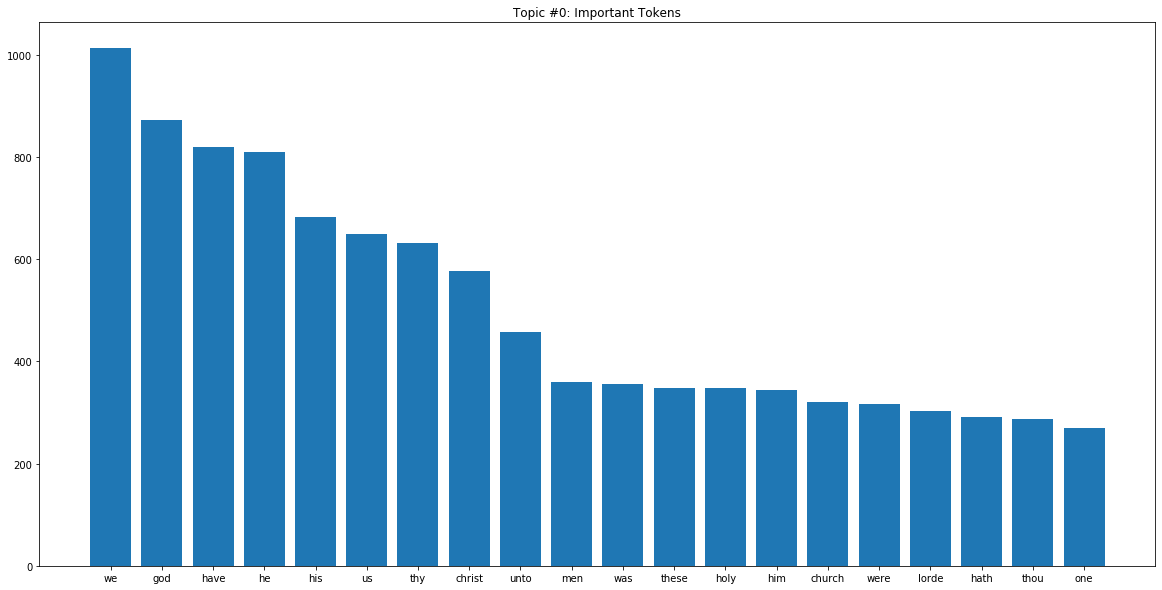

james:

Topic #0:
he his unto was him lord king were israel had son came when children out house on went there people up sons god into one men 11 before 10 13 thou an 12 day 14 15 david against saying ye two now man land after these have did over took hundred 16 come offering city moses jerusalem 17 go hand me 18 great even thousand thee brought we us 19 21 put judah according sent 20 priest 23 days father thy 24 my will 25 three 22 26 you behold she about let down shalt 27 pass side spake place 

Topic #1:
he lord unto his thou thy my him will me god thee have ye man you hath when out was we up come 10 your there 11 12 people 14 16 shalt into 13 let things saith 15 us one 18 hast 19 therefore before 22 an 20 against land day 17 go 21 men say behold earth thine hand even now 23 jesus who neither on israel were am down heart 24 she make house know good away son give 25 father name 26 these like great came had forth nor among saying yet more 27 mine whom take 



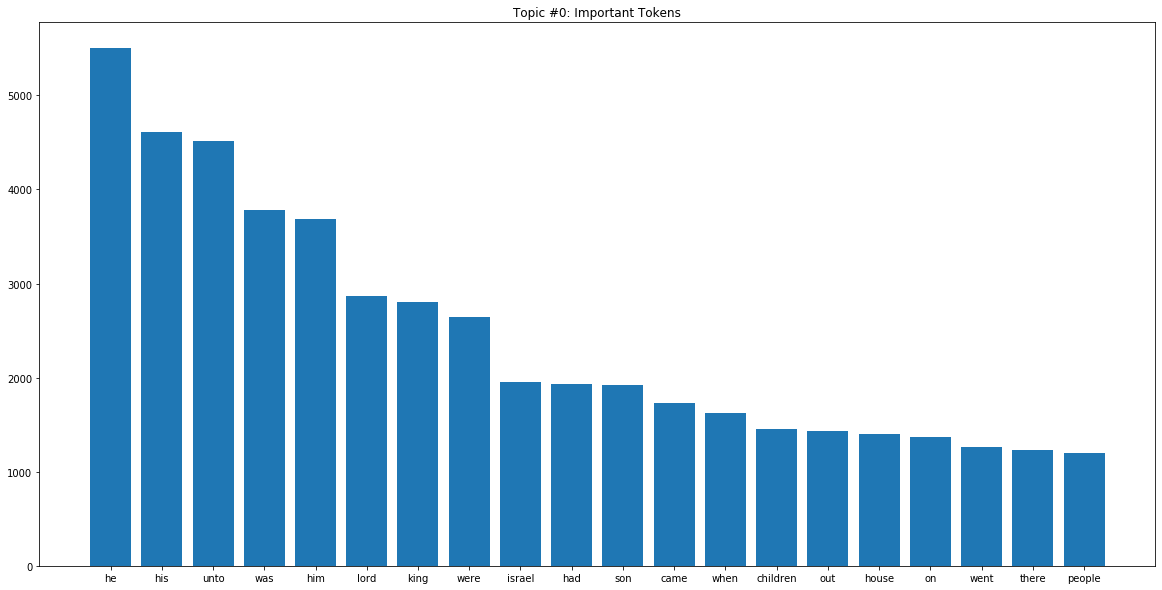

charles:

Topic #0:
his god he we thy him christ holy us unto church have most father one will sin who hath son jesus sins thee yet own word good body therefore life lord those things being world man these people spirit according come himself whom grace through power both more was after almighty an receive your into nor blood can communion gen death only men themselves mercy without when there law before works thereunto you up were under did priest glory day truly take lawful truth bread make against faith kingdom doth divine persons given peace on hearts love sacrament whole although 

Topic #1:
rom ii john cor 13 10 11 matt ps 15 12 acts heb 17 14 god eph 16 lord 19 20 18 christ gal 22 23 unto isa pet tim holy 24 28 luke 26 21 25 iii faith col priest chapter man time gen have 30 iv hath rev only give 27 there thess called 32 she grace deut under people job spirit exod was say men gospel my 31 jer 33 communion his you mark glory jesus through 34 james life 29 sacrament vi worship appo

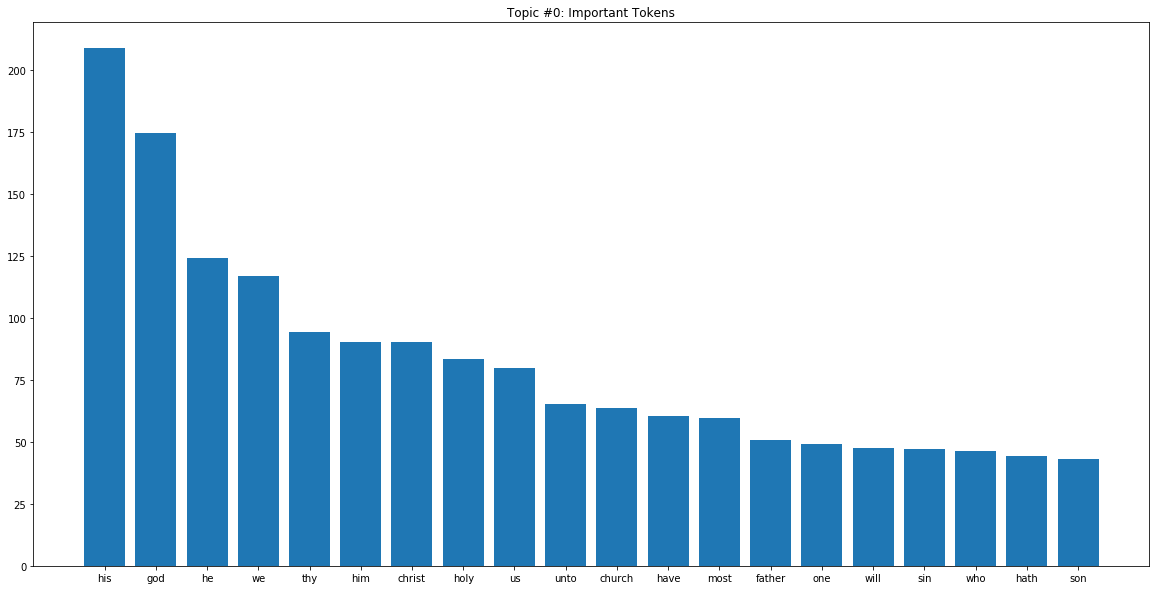

In [41]:
for ccp_model_name in ccp_models:
    # get fitted data and transformed matrix
    ccp_data = ccp_models[ccp_model_name][0].fit(ccp_models[ccp_model_name][1])

    # extract the features to a simple list
    feature_names = ccp_models[ccp_model_name][2].get_feature_names()

    # how many words do we want to extract for each topic?
    n_words = 100
    
    print(ccp_model_name+":\n")
    # now produce topics
    for topic_idx, topic in enumerate(ccp_models[ccp_model_name][0].components_):
        print("Topic #%d:" % topic_idx)
        for i in topic.argsort()[:-n_words - 1:-1]:
            print("{0} ".format(feature_names[i]),end="")
        print("\n")
        
        # plot the words from the first topic
    data = ccp_models[ccp_model_name][0].components_[0]
    word_index = data.argsort()[:-20 - 1:-1]

    x = [feature_names[x] for x in word_index]
    y = [data[x] for x in word_index]

    plt.figure(figsize=(20,10))
    plt.title("Topic #0: Important Tokens")

    plt.xlabel("")
    plt.ylabel("")
    plt.bar(x,y)
    plt.show()

    ccp_transformed_data = ccp_models[ccp_model_name][0].fit_transform(counts)

    # make lists of topics and texts for labels
    topics = ["Topic " + str(i) for i in range(ccp_models[ccp_model_name][0].n_components)]
    texts = ["Text " + str(i) for i in range(len(ccp_models[ccp_model_name][3]))]

    # put data into a special datatype called a Pandas DataFrame
    topic_chart = pd.DataFrame(np.round(ccp_transformed_data, 3), columns=topics, index=texts)
    
    ccp_models[ccp_model_name].append(topic_chart)

    # extract the most dominant topic by searching for largest value
    topic_chart['Dominant Topic'] = np.argmax(topic_chart.values, axis=1)

    # Display
    topic_chart